## Load the Data

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

## Detect Missing Data

In [3]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Handle Missing Values
Option A: Drop Columns or Rows

In [4]:
df.isnull().sum()



,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
df.drop('Cabin',axis=1,inplace=True)#to drop the column cabin since it has many missing values

In [6]:
df.dropna(subset=['Embarked'], inplace=True)#drops only the 2 rows missing values in embarked

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Option B:Fill Missing Data

In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-8-1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


# Check Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

# Remove duplicates

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df['passengerId']=df['PassengerId'].astype(str)#Convert PassengerId to string (it's not really numeric)

In [12]:
df['Pclass'] = df['Pclass'].astype('category')#Convert 'Pclass' to category


In [48]:
df.describe()

,Sex,Age,Fare,SibSp,Parch,Survived,FamilySize
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.350956,29.315152,32.096681,0.524184,0.382452,0.382452,1.906637
std,0.477538,12.984932,49.697504,1.103705,0.806761,0.486260,1.614703
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,22.000000,7.895800,0.000000,0.000000,0.000000,1.000000
50%,0.000000,28.000000,14.454200,0.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,31.000000,1.000000,0.000000,1.000000,2.000000
max,1.000000,80.000000,512.329200,8.000000,6.000000,1.000000,11.000000


# Detect Outliers (visually for now)
Outliers are points that fall far outside the normal range.
Boxplots show the median (center), quartiles (boxes), and outliers (dots).

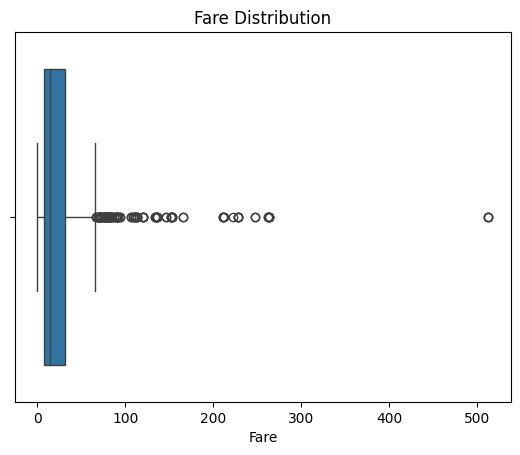

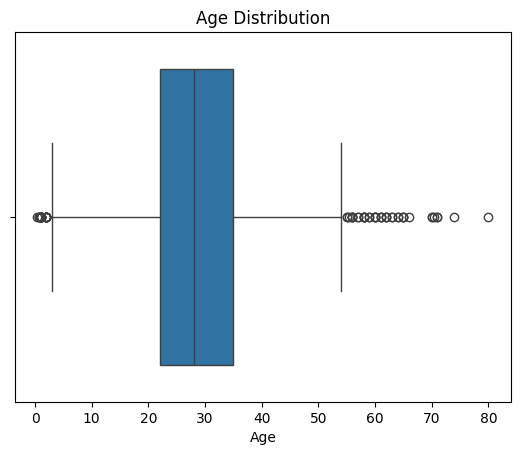

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to detect outliers-plot Fare and Age to spot extreme values
sns.boxplot(x=df['Fare'])
plt.title("Fare Distribution")
plt.show()

sns.boxplot(x=df['Age'])
plt.title("Age Distribution")
plt.show()


Boxplots are used to visualize outliers in `Fare` and `Age`. This helps us identify extreme values that may affect analysis or modeling. No changes are made to the data at this point.

In [14]:
df.to_csv("titanic_cleaned.csv", index=False)


In [16]:
df=pd.read_csv('titanic_cleaned.csv')

# Summary Statistics

In [17]:
print(df.shape)

(889, 12)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  passengerId  889 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.5+ KB


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,passengerId
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681,446.000000
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504,256.998173
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,224.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,446.000000
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,668.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,891.000000


In [20]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,passengerId
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,5
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,6
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,7
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,8
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,9
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,10


## Extract Title from the Name Column

In [21]:
# Extract title using regex (e.g., Mr., Miss., etc.)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()


,count
Title,
Mr,517
Miss,181
Mrs,124
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


## Group Rare Titles

In [22]:
# Replace rare titles with 'Rare'
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev',
               'Sir', 'Jonkheer', 'Dona']

df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Normalize similar titles
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

df['Title'].value_counts()


,count
Title,
Mr,517
Miss,184
Mrs,125
Master,40
Rare,23


## Drop Columns I No Longer Need

In [23]:
# Drop Name and Ticket as they don’t add value anymore
df.drop(['Name', 'Ticket'], axis=1, inplace=True)


## Bin Age and Fare

In [24]:
# Bin age into categories
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

# Bin fare into quartiles
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid', 'High', 'Very High'])


## Convert/Map Categorical Columns

In [25]:
# Convert 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

# Convert 'Pclass' to category with labels
df['Pclass'] = df['Pclass'].map({1: 'Upper', 2: 'Middle', 3: 'Lower'})


## Reorder and Rename Columns

In [26]:
# Reorder columns
cols = ['Title', 'Sex', 'Age', 'AgeGroup', 'Fare', 'FareBand', 'Pclass',
        'SibSp', 'Parch', 'Survived', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

df = df[cols]


In [27]:
df.to_csv("titanic_structured.csv", index=False)


In [28]:
df=pd.read_csv('titanic_structured.csv')

In [29]:
df.describe()

,Sex,Age,Fare,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.350956,29.315152,32.096681,0.524184,0.382452,0.382452
std,0.477538,12.984932,49.697504,1.103705,0.806761,0.486260
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,28.000000,14.454200,0.000000,0.000000,0.000000
75%,1.000000,35.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,512.329200,8.000000,6.000000,1.000000


In [30]:
df.head(10)

,Title,Sex,Age,AgeGroup,Fare,FareBand,Pclass,SibSp,Parch,Survived,Embarked_C,Embarked_Q,Embarked_S
0,Mr,0,22.0,YoungAdult,7.2500,Low,Lower,1,0,0,False,False,True
1,Mrs,1,38.0,Adult,71.2833,Very High,Upper,1,0,1,True,False,False
2,Miss,1,26.0,YoungAdult,7.9250,Mid,Lower,0,0,1,False,False,True
3,Mrs,1,35.0,YoungAdult,53.1000,Very High,Upper,1,0,1,False,False,True
4,Mr,0,35.0,YoungAdult,8.0500,Mid,Lower,0,0,0,False,False,True
5,Mr,0,28.0,YoungAdult,8.4583,Mid,Lower,0,0,0,False,True,False
6,Mr,0,54.0,Adult,51.8625,Very High,Upper,0,0,0,False,False,True
7,Master,0,2.0,Child,21.0750,High,Lower,3,1,0,False,False,True
8,Mrs,1,27.0,YoungAdult,11.1333,Mid,Lower,0,2,1,False,False,True
9,Mrs,1,14.0,Teen,30.0708,High,Middle,1,0,1,True,False,False


## Compare Survival Rates by Sex

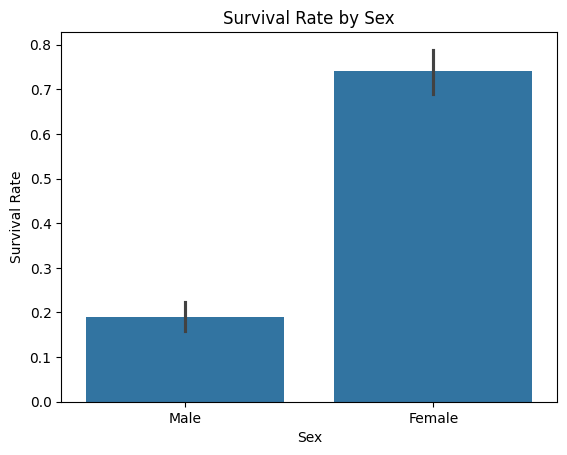

In [31]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()


There's a much higher survival among females. Gender mattered in Titanic survival, likely due to the "women and children first" evacuation rule.

## Compare by Pclass (Upper, Middle, Lower)

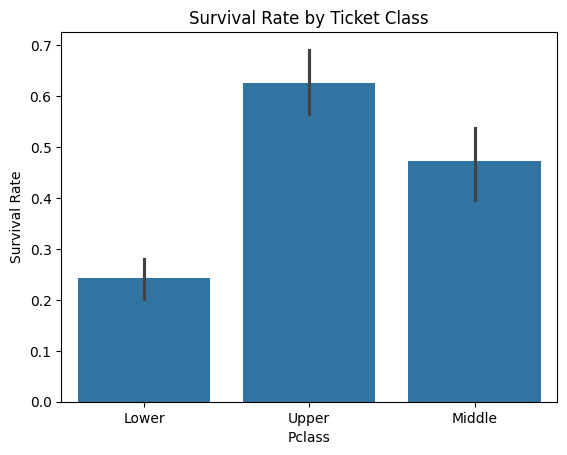

In [32]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Ticket Class")
plt.ylabel("Survival Rate")
plt.show()


Higher class passengers had higher survival chance because First-class passengers had better access to lifeboats and exits.

## Survival by Age Group

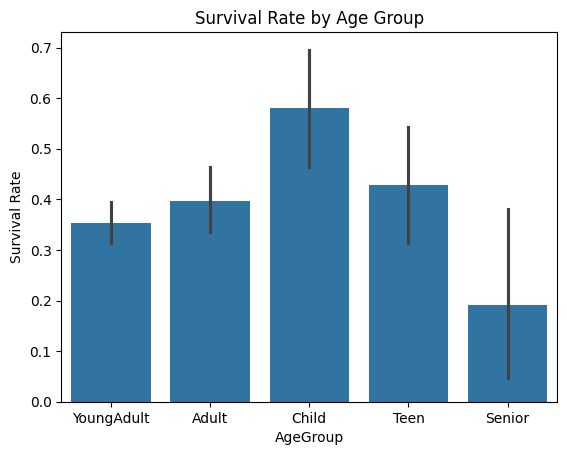

In [33]:
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.show()


Children had relatively higher survival, especially vs seniors and young adults. This is another sign of prioritization.

## Compare Survival by Title

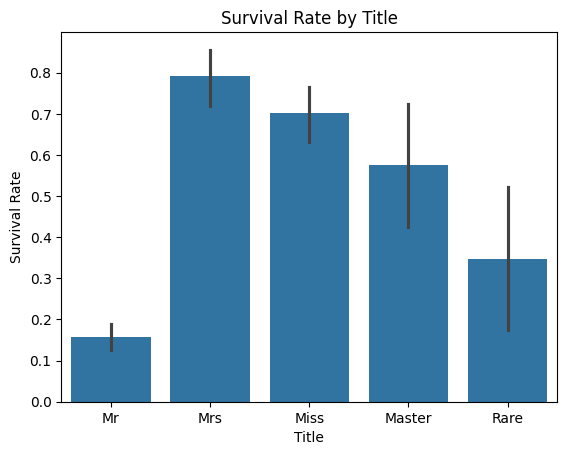

In [34]:
sns.barplot(x='Title', y='Survived', data=df)
plt.title("Survival Rate by Title")
plt.ylabel("Survival Rate")
plt.show()


There's an interesting difference between Mr, Miss, Mrs, and Rare. Some Rare titles like Dr, Col, Rev may reflect older or wealthier males, which often had lower survival.

## Cross Feature Relationship (Sex vs Pclass)

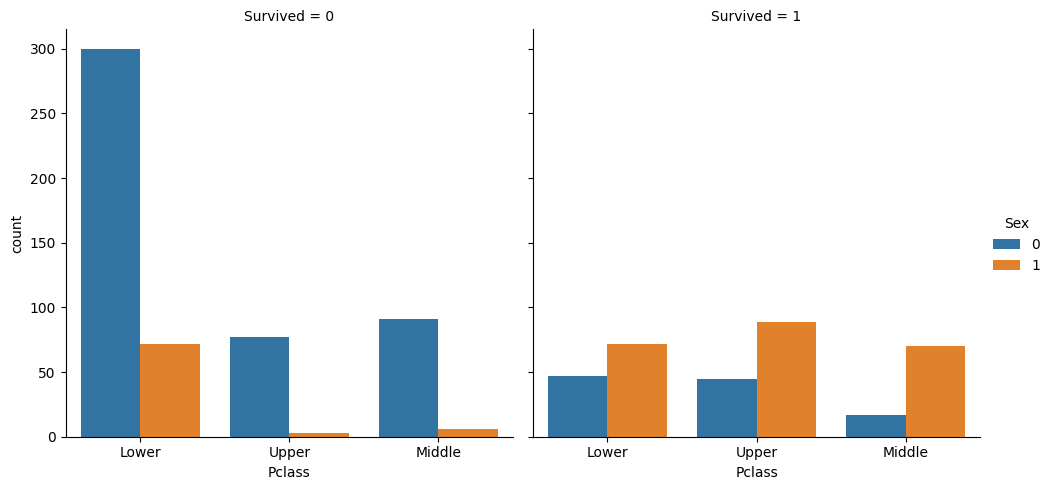

In [35]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')


Helps us visualize the gender and class distribution among survivors vs non-survivors.

This plot compares survival counts across passenger classes and genders.

Key Observations:
- Most non-survivors were men in 3rd class.
- Most survivors were women, especially in 1st and 2nd class.
- Few women in 1st class died, highlighting gender and class privilege in lifeboat access.

This confirms that both **gender** and **class** were strong predictors of survival.

## Correlation Heatmap

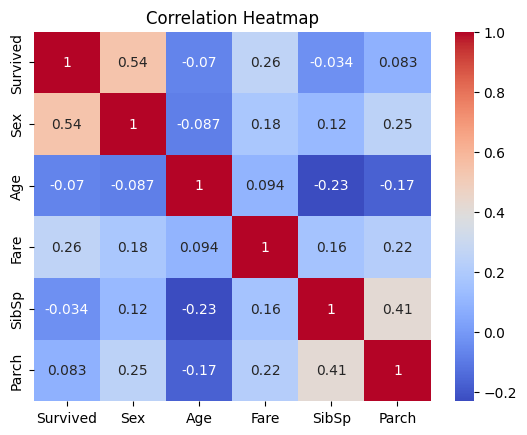

In [36]:
numeric_df = df[['Survived', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


The correlation heatmap reveals that passenger gender (Sex) is the most significant factor influencing survival on the Titanic. With a strong positive correlation (0.54), it confirms that females had a much higher chance of surviving than males.

Additionally, there’s a moderate positive correlation between Fare and Survival (0.26) — indicating that passengers who paid higher fares, often associated with higher-class cabins, were more likely to survive.

Other features like Age, SibSp (siblings/spouses), and Parch (parents/children) show weak correlations with survival, suggesting their individual predictive power is limited, but they might contribute more when combined (e.g. into a FamilySize feature).

Also, the strong correlation between SibSp and Parch (0.41) implies family-related features are interlinked, and shouldn’t be used together without adjustment, to avoid redundancy in modeling.

In summary, survival on the Titanic was strongly influenced by gender and socio-economic status, while age and family presence had weaker, more nuanced effects. These insights help guide which features to prioritize or combine when building predictive models or crafting visual stories.

## Cross-tabulation of Title and Survival

In [37]:
pd.crosstab(df['Title'], df['Survived'], normalize='index').round(2)


Survived,0,1
Title,,
Master,0.42,0.57
Miss,0.30,0.70
Mr,0.84,0.16
Mrs,0.21,0.79
Rare,0.65,0.35


Miss and Mrs titles had higher chances of survival most likely because of the womn and children first evacuation.

## Explore SibSp + Parch

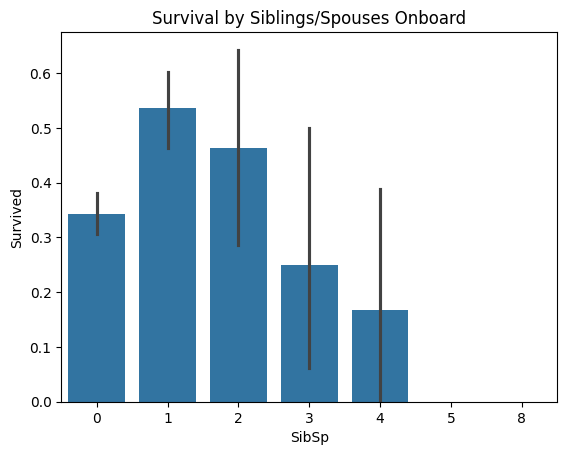

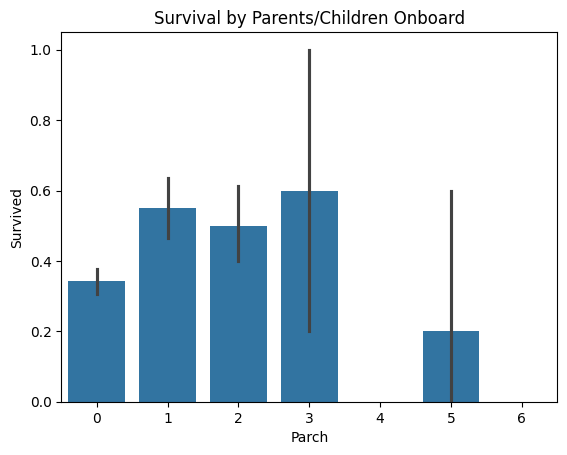

In [38]:
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title("Survival by Siblings/Spouses Onboard")
plt.show()

sns.barplot(x='Parch', y='Survived', data=df)
plt.title("Survival by Parents/Children Onboard")
plt.show()


Those with small families had better survival. Alone = low chance, too many = hard to escape.

## Combine Family Features

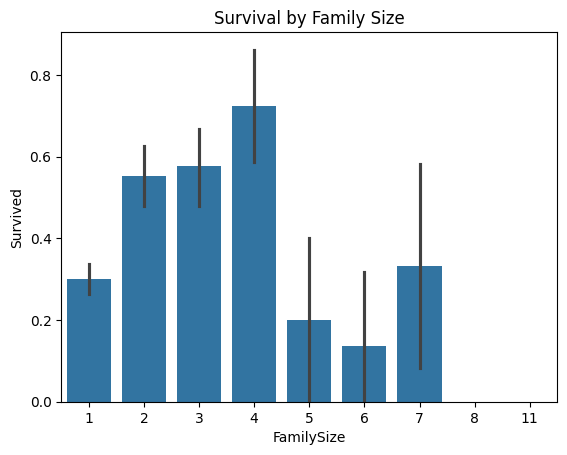

In [39]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival by Family Size")
plt.show()


Ideal family size for survival was 2–4. Solos and large groups had lower survival rates.

In [40]:
df.head(10)

,Title,Sex,Age,AgeGroup,Fare,FareBand,Pclass,SibSp,Parch,Survived,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,Mr,0,22.0,YoungAdult,7.2500,Low,Lower,1,0,0,False,False,True,2
1,Mrs,1,38.0,Adult,71.2833,Very High,Upper,1,0,1,True,False,False,2
2,Miss,1,26.0,YoungAdult,7.9250,Mid,Lower,0,0,1,False,False,True,1
3,Mrs,1,35.0,YoungAdult,53.1000,Very High,Upper,1,0,1,False,False,True,2
4,Mr,0,35.0,YoungAdult,8.0500,Mid,Lower,0,0,0,False,False,True,1
5,Mr,0,28.0,YoungAdult,8.4583,Mid,Lower,0,0,0,False,True,False,1
6,Mr,0,54.0,Adult,51.8625,Very High,Upper,0,0,0,False,False,True,1
7,Master,0,2.0,Child,21.0750,High,Lower,3,1,0,False,False,True,5
8,Mrs,1,27.0,YoungAdult,11.1333,Mid,Lower,0,2,1,False,False,True,3
9,Mrs,1,14.0,Teen,30.0708,High,Middle,1,0,1,True,False,False,2


## Overall Survival Rate

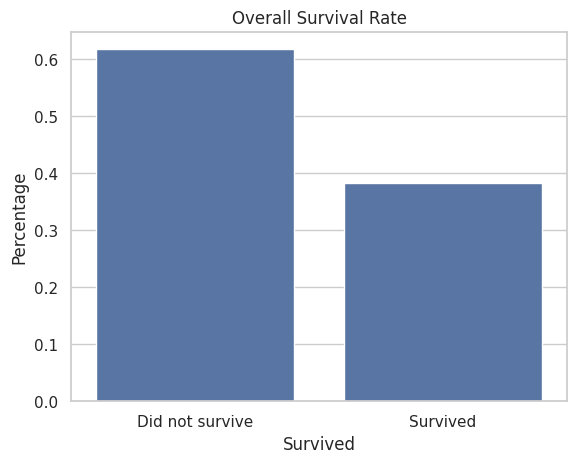

In [42]:
# Set style
sns.set(style='whitegrid')

survival_rate = df['Survived'].value_counts(normalize=True)
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.title("Overall Survival Rate")
plt.ylabel("Percentage")
plt.show()


Only about 38% of the passengers survived, showing that the majority did not make it.

In [47]:
from google.colab import files
df.to_csv('titanic_structured.csv', index=False)
files.download('titanic_structured.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>